In [2]:
#Import necessary libarbies 
import pandas as pd
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [8]:
loan_df=pd.read_csv(r'C:\Users\USER\Guvi python\Forage\Task 3 and 4_Loan_Data.csv')
# Initial inspection
print(loan_df.info())
print(loan_df.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB
None
   customer_id  credit_lines_outstanding  loan_amt_outstanding  \
0      8153374                         0           5221.545193   
1      7442532                         5           1958.928726   
2      2256073                         0           3363.009259   
3      4885975        

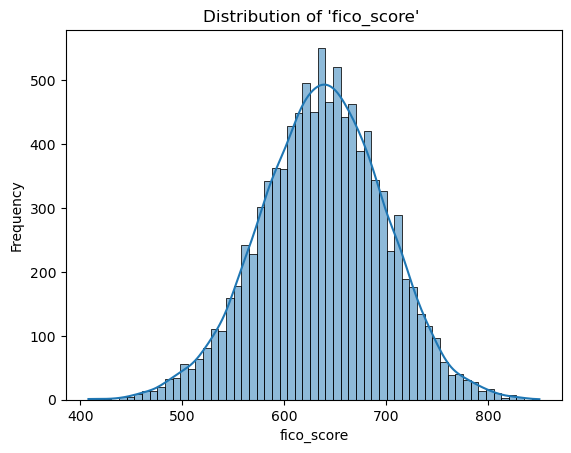

In [18]:
#Exploratory Data Analysis


sns.histplot(loan_df,x='fico_score', kde=True)
plt.title(f'Distribution of \'fico_score\' ')
plt.xlabel('fico_score')
plt.ylabel('Frequency')
plt.show()

fico_score is normally distributed

In [64]:
df = loan_df[['fico_score']]

# Define the number of clusters (buckets)
n_clusters = int(input('Enter the number of clusters : '))

# Perform KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(df[['fico_score']])

# Get the cluster labels
df['cluster_label'] = kmeans.labels_

# Get the cluster centers
cluster_centers = kmeans.cluster_centers_.flatten()
cluster_centers.sort()

# Map FICO scores to ratings
df['rating'] = df['cluster_label'].apply(lambda x: n_clusters - x)

print("Cluster Centers:")
print(cluster_centers)
# Calculate the boundaries (midpoints)
boundaries = (cluster_centers[:-1] + cluster_centers[1:]) / 2

# Add the minimum and maximum values as boundaries
boundaries = np.concatenate([[float(df['fico_score'].min())], boundaries, [float(df['fico_score'].max())]])

print("Boundaries:")
print(boundaries)

print(df.head())

Enter the number of clusters :  4


Cluster Centers:
[542.1903503  608.15599393 663.0354569  726.2327336 ]
Boundaries:
[408.         575.17317211 635.59572542 694.63409525 850.        ]
   fico_score  cluster_label  rating
0         605              1       3
1         572              2       2
2         602              1       3
3         612              1       3
4         631              1       3
